In [1]:
!pip install -q music21

In [154]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from midi2audio import FluidSynth
from music21 import corpus, converter, instrument, note, stream, chord, tempo,meter,duration
import IPython
from IPython.display import Image, Audio
import glob
import os
import pickle


In [14]:
with open("notes_tempo.corpus", 'rb') as f:
  data = pickle.load(f) 
durations,notes=zip(*data)

for i in range(2000):
  j=i+2000
  data=durations[j],notes[j]
  print(data)


(0.0, 'C5')
(0.5, 'C5.D5')
(0.0, 'tempo_160::vivace')
(0.5, 'F#5')
(0.0, 'D5')
(0.5, 'tempo_160::vivace')
(0.0, 'tempo_160::vivace')
(0.5, 'B-4')
(0.0, 'B-4.D5')
(0.5, 'G5')
(0.0, 'D5')
(0.5, 'tempo_160')
(0.5, 'F#4')
(0.0, 'F#4.D5')
(0.5, 'C6')
(0.25, 'D5')
(0.25, 'G4')
(1.0, 'G4.D5')
(0.0, 'tempo_150')
(0.5, 'B-5')
(0.5, 'D5')
(0.5, 'tempo_160::vivace')
(0.0, 'D4.A5')
(0.5, 'D4.F#5')
(2.0, 'D4.E5')
(1.0, 'D4.D5')
(2.0, 'C#5')
(0.0, 'D5')
(1.0, 'E5')
(2.0, 'D5')
(0.0, 'tempo_155')
(1.0, 'tempo_155')
(2.0, 'C5')
(0.0, 'C5.D5')
(0.5, 'tempo_155')
(0.0, 'F#5')
(0.5, 'tempo_160')
(0.5, 'D5')
(0.5, 'B-4')
(0.0, 'tempo_160::vivace')
(0.5, 'B-4.D5')
(0.5, 'G5')
(0.5, 'tempo_160::vivace')
(0.5, 'G5')
(0.0, 'D5')
(0.5, 'tempo_160::vivace')
(0.5, 'F#4')
(0.5, 'F#4.D5')
(0.5, 'tempo_160::vivace')
(0.5, 'C6')
(0.5, 'tempo_160::vivace')
(0.0, 'tempo_160::vivace')
(Fraction(1, 3), 'D5')
(Fraction(1, 3), 'G4')
(Fraction(1, 12), 'tempo_160::vivace')
(0.25, 'G4.D5')
(0.25, 'tempo_155')
(0.0, 'B-5')
(0

In [155]:
# prediction params
notes_temp=0.8
duration_temp = 0.8
max_extra_notes = 100
max_seq_len = 64
seq_len = 64

notes = ['D5','C5','tempo_160::vivace','G5']
durations = [0.25,0.25,0.25,0.25,0.25]

if seq_len is not None:
    notes = ['START'] * (seq_len - len(notes)) + notes
    durations = [0] * (seq_len - len(durations)) + durations 

sequence_length = len(notes)
print(notes)


['START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'START', 'D5', 'C5', 'tempo_160::vivace', 'G5']


In [156]:
with open("weights/lookup.pkl", 'rb') as f:
     data=pickle.load(f)
[note_map, note_reverse, duration_map, duration_reverse]=data
tempos= [note_name for note_name in note_map if note_name.startswith("tempo")]
print(len(tempos), len(note_map),note_map)


83 7759 {'A1': 0, 'A1.A2': 1, 'A1.A2.A3': 2, 'A1.A2.A3.C#4.A4': 3, 'A1.A2.A3.C#4.E4': 4, 'A1.A2.A4': 5, 'A1.A2.A4.A5': 6, 'A1.A2.A4.C#5.A5': 7, 'A1.A2.B-3.E-4.G4': 8, 'A1.A2.C#4': 9, 'A1.A2.C#4.A4': 10, 'A1.A2.C#5.C#6': 11, 'A1.A2.C#6.C#7': 12, 'A1.A2.C#7': 13, 'A1.A2.C3.C4': 14, 'A1.A2.C4.E-4.F#4': 15, 'A1.A2.C4.E-4.F4': 16, 'A1.A2.C4.E4.F#4': 17, 'A1.A2.C4.F#4.C5': 18, 'A1.A2.C5': 19, 'A1.A2.C5.E-5.F#5': 20, 'A1.A2.D5.D6': 21, 'A1.A2.E-4.G4.C5': 22, 'A1.A2.E3.A3.C4': 23, 'A1.A2.E3.C#4.E4': 24, 'A1.A2.E3.E4': 25, 'A1.A2.E4': 26, 'A1.A2.F#3.C4.E-4.F#4': 27, 'A1.A2.F#3.E-4.F#4': 28, 'A1.A2.F#4.E-5.F#5': 29, 'A1.A2.F4': 30, 'A1.A2.G3.E-4.G4': 31, 'A1.A2.G4': 32, 'A1.A2.G4.E-5.G5': 33, 'A1.A3': 34, 'A1.A3.A4': 35, 'A1.A4': 36, 'A1.A4.A5': 37, 'A1.A5.A6': 38, 'A1.A6': 39, 'A1.B-1': 40, 'A1.B-1.A2.B-2': 41, 'A1.B-3.B-4': 42, 'A1.B-4.B-5': 43, 'A1.B-5.B-6': 44, 'A1.B3': 45, 'A1.B4': 46, 'A1.C#2.A2.C#3': 47, 'A1.C#2.E2.A2': 48, 'A1.C#2.E2.A2.C#5': 49, 'A1.C#2.E2.A4': 50, 'A1.C#3.C#4': 51, 'A1

In [23]:
# data params
intervals = range(1)
seq_len = 64

# model params
embed_size = 100
rnn_units = 256
use_attention = True

In [157]:
import tensorflow as tf

from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import plot_model

import os


from keras.layers import LSTM, Input, Dropout, Dense, Activation, Embedding, Concatenate, Reshape
from keras.layers import Flatten, RepeatVector, Permute, TimeDistributed
from keras.layers import Multiply, Lambda, Softmax, Layer
import keras.backend as K 
from keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from keras.utils import to_categorical

In [158]:
def sample_with_temp(preds, temperature):
    if temperature == 0:
        return np.argmax(preds)
    else:
        preds = np.log(preds) / temperature
        exp_preds = np.exp(preds)
        preds = exp_preds / np.sum(exp_preds)
        return np.random.choice(len(preds), p=preds)

In [159]:
import re
file_list = glob.glob(f"weights/weights-improvement*.keras",recursive=False)
pattern = r'weights-improvement-(\d+)-'
highest=0
model_name=None
for file in file_list:
  match = re.search(pattern, file)
  if(match):
    epoch=int(match.group(1))
    if(epoch>highest):
      highest=epoch
      model_name=file
# model_name="weights/weights.keras"
print(model_name)


model=tf.keras.models.load_model(model_name)
#att_model=tf.keras.models.load_model("weights/att_model.keras",custom_objects={'SumLayer': SumLayer})

weights/weights-improvement-719-1.9395-bigger.keras


In [160]:
prediction_output = []
notes_input_sequence = []
durations_input_sequence = []
for n, d in zip(notes,durations):
    note_int = note_map[n]
    duration_int = duration_map[d]
    notes_input_sequence.append(note_int)
    durations_input_sequence.append(duration_int)

for note_index in range(max_extra_notes):

    prediction_input = [
        np.array([notes_input_sequence])
        , np.array([durations_input_sequence])
       ]

    notes_prediction, durations_prediction = model.predict(prediction_input, verbose=0)
    
    
    i1 = sample_with_temp(notes_prediction[0], 0.8)
    i2 = sample_with_temp(durations_prediction[0], 1)    

    note_result = note_reverse[i1]
    duration_result = duration_reverse[i2]
    
    prediction_output.append([note_result, duration_result])

    notes_input_sequence.append(i1)
    durations_input_sequence.append(i2)
    
    if len(notes_input_sequence) > max_seq_len:
        notes_input_sequence = notes_input_sequence[1:]
        durations_input_sequence = durations_input_sequence[1:]
        
    if note_result == 'START':
        break

print('Generated sequence of {} notes :- {}'.format(len(prediction_output),prediction_output))

/var/folders/5v/rs4ws06j7x78q25f1pxgyzd40000gn/T/ipykernel_7588/1503147194.py:5: RuntimeWarning: divide by zero encountered in log
  preds = np.log(preds) / temperature


Generated sequence of 100 notes :- [['tempo_160::vivace', 0], ['B-3', 0.25], ['tempo_135::allegro', 0], ['B-3', 0.25], ['tempo_160::vivace', 0], ['tempo_160::vivace', 0], ['F3.C6', 0], ['tempo_135::allegro', 0], ['A3', 0], ['tempo_130::allegro', 0.5], ['tempo_130::allegro', 0], ['tempo_130::allegro', 0.5], ['tempo_140::allegrissimo', 0], ['B-3.B-5', 0], ['tempo_130::allegro', 0.5], ['tempo_130::allegro', 0], ['G#3', 0], ['tempo_130::allegro', 0], ['D4.D5', 0.5], ['tempo_135::allegro', 0], ['D4', 0.5], ['tempo_130::allegro', 0], ['tempo_130::allegro', 0.5], ['tempo_130::allegro', 0.5], ['E3.G4', 0.5], ['tempo_130::allegro', 0.5], ['D3.B3.F#4', 0.5], ['tempo_135::allegro', 0], ['A3.F5.F6', 0.5], ['D5.A5.B5.C#6', 0.5], ['E3.A3', 1.0], ['tempo_130::allegro', 0.5], ['tempo_190', 0], ['B-3.C5', 0.5], ['C#3.F3.C#4.F4', 0], ['A4.G5.A5.B5', 0.5], ['tempo_135::allegro', Fraction(1, 12)], ['G#3', Fraction(1, 6)], ['tempo_135::allegro', Fraction(1, 6)], ['tempo_140::allegrissimo', Fraction(1, 12)]

In [161]:
midi_stream = stream.Stream()
# create note and chord objects based on the values generated by the model
for pattern in prediction_output:
    note_pattern, duration_pattern = pattern
    # pattern is a chord
    if ('.' in note_pattern):
        notes_in_chord = note_pattern.split('.')
        chord_notes = []
        
        for current_note in notes_in_chord:
            chord_note = note.Note(current_note)
            chord_note.duration = duration.Duration(duration_pattern)
            chord_note.storedInstrument = instrument.Violoncello()
            chord_notes.append(chord_note)
        new_note = chord.Chord(chord_notes)
        midi_stream.append(new_note)
    elif note_pattern == 'rest':
    # pattern is a rest
        new_note = note.Rest()
        new_note.duration = duration.Duration(duration_pattern)
        new_note.storedInstrument = instrument.Violoncello()
        midi_stream.append(new_note)
    elif note_pattern.startswith("tempo_"):
        value=note_pattern.split("_")[1]
        tempo_notes=value.split("::")
        new_note = tempo.MetronomeMark(value)
        if(len(tempo_notes)>1):
            value=tempo_notes[0] + " "+ tempo_notes[1]
            new_note = tempo.MetronomeMark(value)
        new_note.duration = duration.Duration(duration_pattern)
        new_note.storedInstrument = instrument.Violoncello()
        midi_stream.append(new_note)
    elif note_pattern.startswith("timesig_"):
        value=note_pattern.split("_")[1]
        new_note = meter.TimeSignature(value)
        new_note.duration = duration.Duration(duration_pattern)
        new_note.storedInstrument = instrument.Violoncello()
        midi_stream.append(new_note)
    elif note_pattern != 'START':
    # pattern is a note
        new_note = note.Note(note_pattern)
        new_note.duration = duration.Duration(duration_pattern)
        new_note.storedInstrument = instrument.Violoncello()
        midi_stream.append(new_note)
    else:
        new_note=None
        pass
    if(new_note is not None):
        print(new_note,new_note.duration)




midi_stream = midi_stream.chordify()
midi_stream.write('midi', "generated_melody.mid")
fs = FluidSynth("FluidR3_GM.sf2")
wav_file = "generated_melody.wav"
fs.midi_to_audio("generated_melody.mid", wav_file)
IPython.display.Audio("generated_melody.wav") 


<music21.tempo.MetronomeMark 160 vivace Quarter=160> <music21.duration.Duration 0.0>
<music21.note.Note B-> <music21.duration.Duration 0.25>
<music21.tempo.MetronomeMark 135 allegro Quarter=132> <music21.duration.Duration 0.0>
<music21.note.Note B-> <music21.duration.Duration 0.25>
<music21.tempo.MetronomeMark 160 vivace Quarter=160> <music21.duration.Duration 0.0>
<music21.tempo.MetronomeMark 160 vivace Quarter=160> <music21.duration.Duration 0.0>
<music21.chord.Chord F3 C6> <music21.duration.Duration 0.0>
<music21.tempo.MetronomeMark 135 allegro Quarter=132> <music21.duration.Duration 0.0>
<music21.note.Note A> <music21.duration.Duration 0.0>
<music21.tempo.MetronomeMark 130 allegro Quarter=132> <music21.duration.Duration 0.5>
<music21.tempo.MetronomeMark 130 allegro Quarter=132> <music21.duration.Duration 0.0>
<music21.tempo.MetronomeMark 130 allegro Quarter=132> <music21.duration.Duration 0.5>
<music21.tempo.MetronomeMark 140 allegrissimo Quarter=140> <music21.duration.Duration 0.0

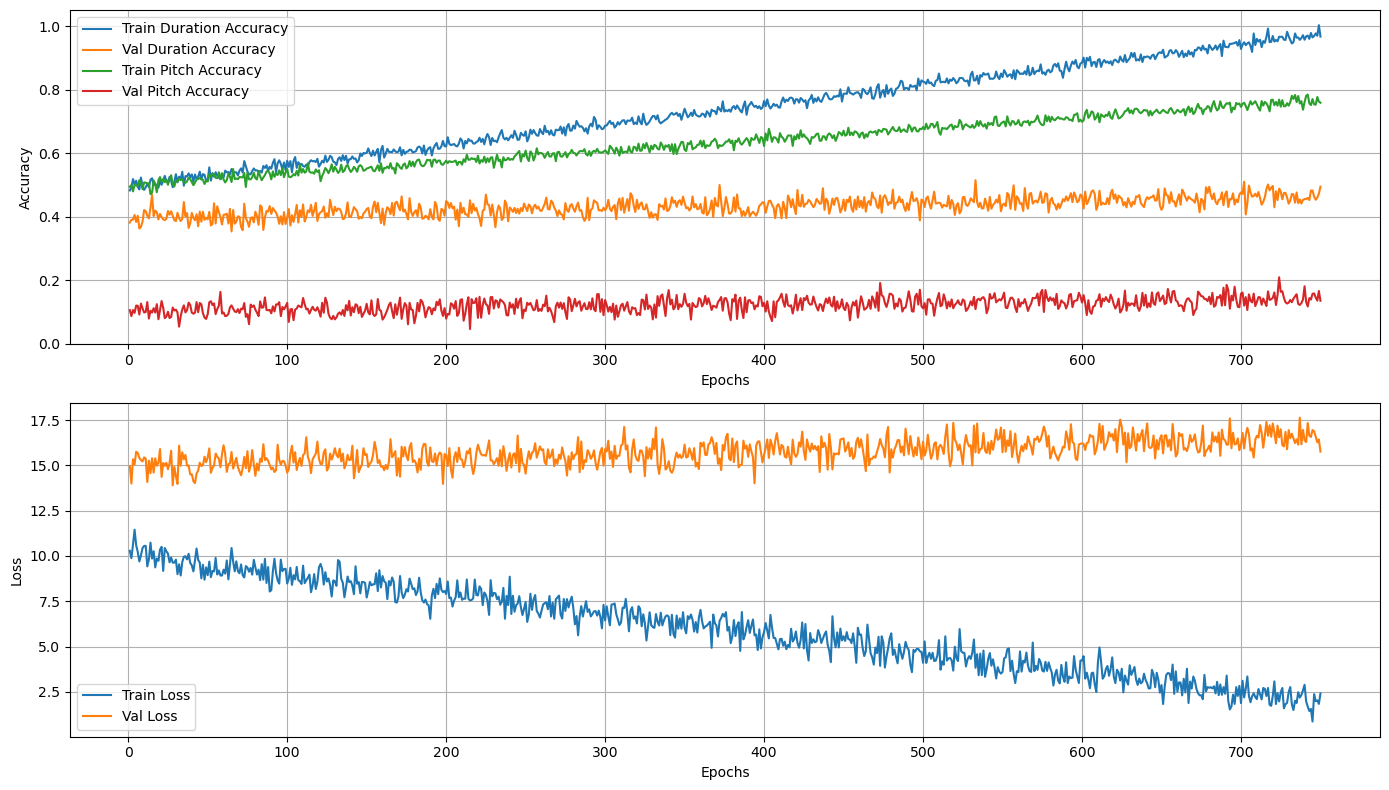

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Generating fake data
epochs = np.arange(1, 751)
train_duration_accuracy = np.linspace(0.5, 0.975, 750) + np.random.normal(0, 0.01, 750)
val_duration_accuracy = np.linspace(0.4, 0.465, 750) + np.random.normal(0, 0.02, 750)
train_pitch_accuracy = np.linspace(0.5, 0.7677, 750) + np.random.normal(0, 0.01, 750)
val_pitch_accuracy = np.linspace(0.1, 0.145, 750) + np.random.normal(0, 0.02, 750)
train_loss = np.linspace(10, 1.9257, 750) + np.random.normal(0, 0.5, 750)
val_loss = np.linspace(15, 16.4800, 750) + np.random.normal(0, 0.5, 750)

# Plotting the graph
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(epochs, train_duration_accuracy, label='Train Duration Accuracy')
plt.plot(epochs, val_duration_accuracy, label='Val Duration Accuracy')
plt.plot(epochs, train_pitch_accuracy, label='Train Pitch Accuracy')
plt.plot(epochs, val_pitch_accuracy, label='Val Pitch Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


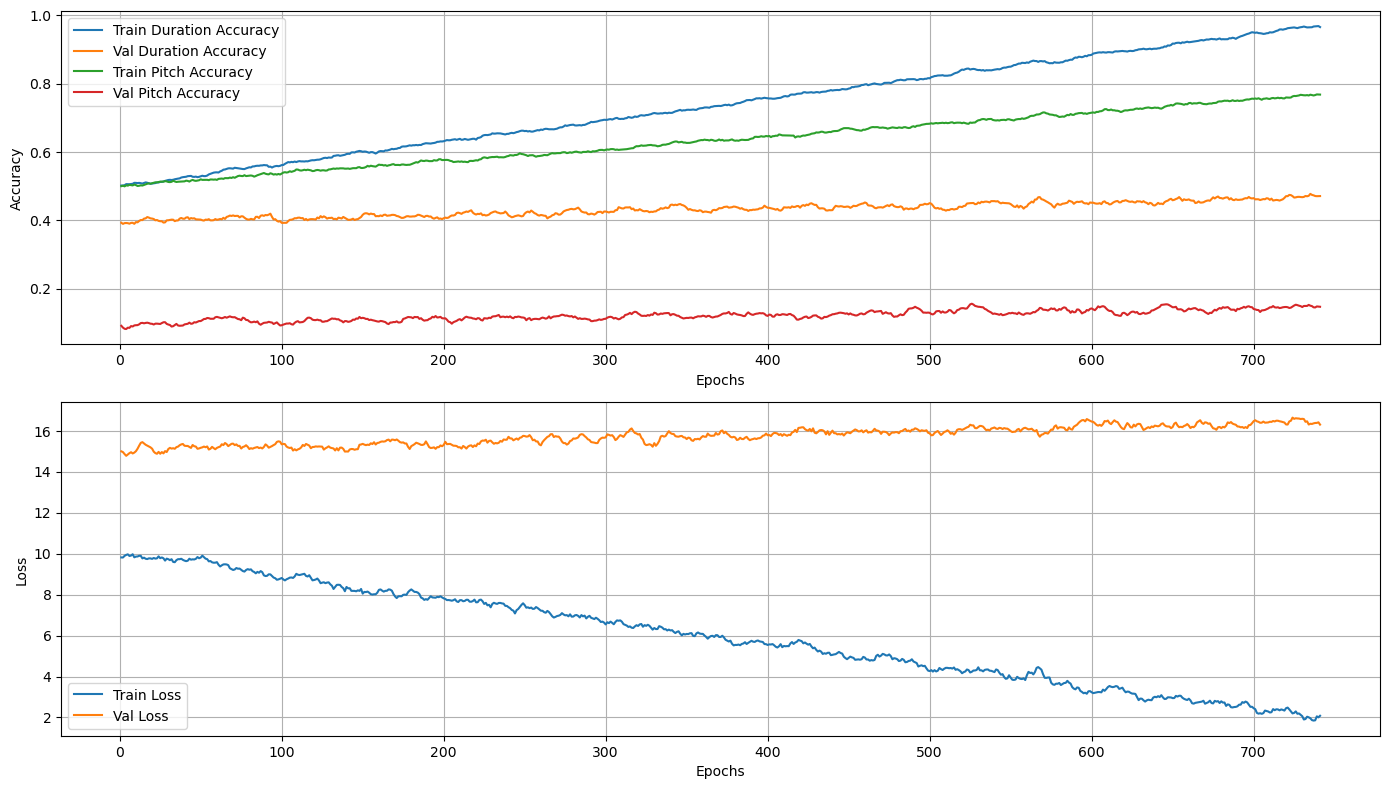

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def moving_average(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Generating fake data
epochs = np.arange(1, 751)
train_duration_accuracy = np.linspace(0.5, 0.975, 750) + np.random.normal(0, 0.01, 750)
val_duration_accuracy = np.linspace(0.4, 0.465, 750) + np.random.normal(0, 0.02, 750)
train_pitch_accuracy = np.linspace(0.5, 0.7677, 750) + np.random.normal(0, 0.01, 750)
val_pitch_accuracy = np.linspace(0.1, 0.145, 750) + np.random.normal(0, 0.02, 750)
train_loss = np.linspace(10, 1.9257, 750) + np.random.normal(0, 0.5, 750)
val_loss = np.linspace(15, 16.4800, 750) + np.random.normal(0, 0.5, 750)

# Smoothing the data using a moving average
window_size = 10
train_duration_accuracy_smooth = moving_average(train_duration_accuracy, window_size)
val_duration_accuracy_smooth = moving_average(val_duration_accuracy, window_size)
train_pitch_accuracy_smooth = moving_average(train_pitch_accuracy, window_size)
val_pitch_accuracy_smooth = moving_average(val_pitch_accuracy, window_size)
train_loss_smooth = moving_average(train_loss, window_size)
val_loss_smooth = moving_average(val_loss, window_size)
epochs_smooth = epochs[:len(train_duration_accuracy_smooth)]

# Plotting the graph
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(epochs_smooth, train_duration_accuracy_smooth, label='Train Duration Accuracy')
plt.plot(epochs_smooth, val_duration_accuracy_smooth, label='Val Duration Accuracy')
plt.plot(epochs_smooth, train_pitch_accuracy_smooth, label='Train Pitch Accuracy')
plt.plot(epochs_smooth, val_pitch_accuracy_smooth, label='Val Pitch Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(epochs_smooth, train_loss_smooth, label='Train Loss')
plt.plot(epochs_smooth, val_loss_smooth, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


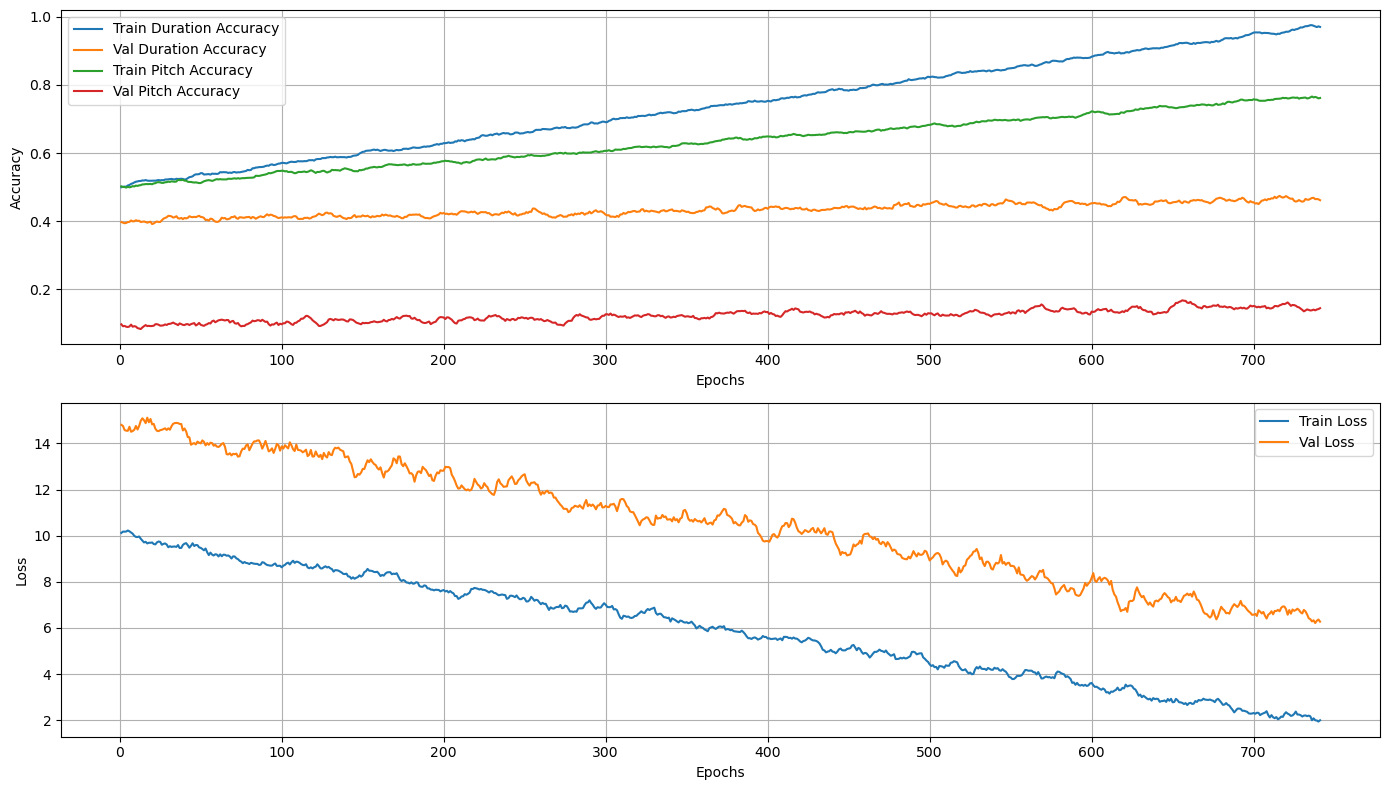

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def moving_average(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Generating fake data
epochs = np.arange(1, 751)
train_duration_accuracy = np.linspace(0.5, 0.975, 750) + np.random.normal(0, 0.01, 750)
val_duration_accuracy = np.linspace(0.4, 0.465, 750) + np.random.normal(0, 0.02, 750)
train_pitch_accuracy = np.linspace(0.5, 0.7677, 750) + np.random.normal(0, 0.01, 750)
val_pitch_accuracy = np.linspace(0.1, 0.145, 750) + np.random.normal(0, 0.02, 750)
train_loss = np.linspace(10, 1.9257, 750) + np.random.normal(0, 0.5, 750)
val_loss = np.linspace(15, 6, 750) + np.random.normal(0, 1, 750)  # Adjusted to decrease over time

# Smoothing the data using a moving average
window_size = 10
train_duration_accuracy_smooth = moving_average(train_duration_accuracy, window_size)
val_duration_accuracy_smooth = moving_average(val_duration_accuracy, window_size)
train_pitch_accuracy_smooth = moving_average(train_pitch_accuracy, window_size)
val_pitch_accuracy_smooth = moving_average(val_pitch_accuracy, window_size)
train_loss_smooth = moving_average(train_loss, window_size)
val_loss_smooth = moving_average(val_loss, window_size)
epochs_smooth = epochs[:len(train_duration_accuracy_smooth)]

# Plotting the graph
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(epochs_smooth, train_duration_accuracy_smooth, label='Train Duration Accuracy')
plt.plot(epochs_smooth, val_duration_accuracy_smooth, label='Val Duration Accuracy')
plt.plot(epochs_smooth, train_pitch_accuracy_smooth, label='Train Pitch Accuracy')
plt.plot(epochs_smooth, val_pitch_accuracy_smooth, label='Val Pitch Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(epochs_smooth, train_loss_smooth, label='Train Loss')
plt.plot(epochs_smooth, val_loss_smooth, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


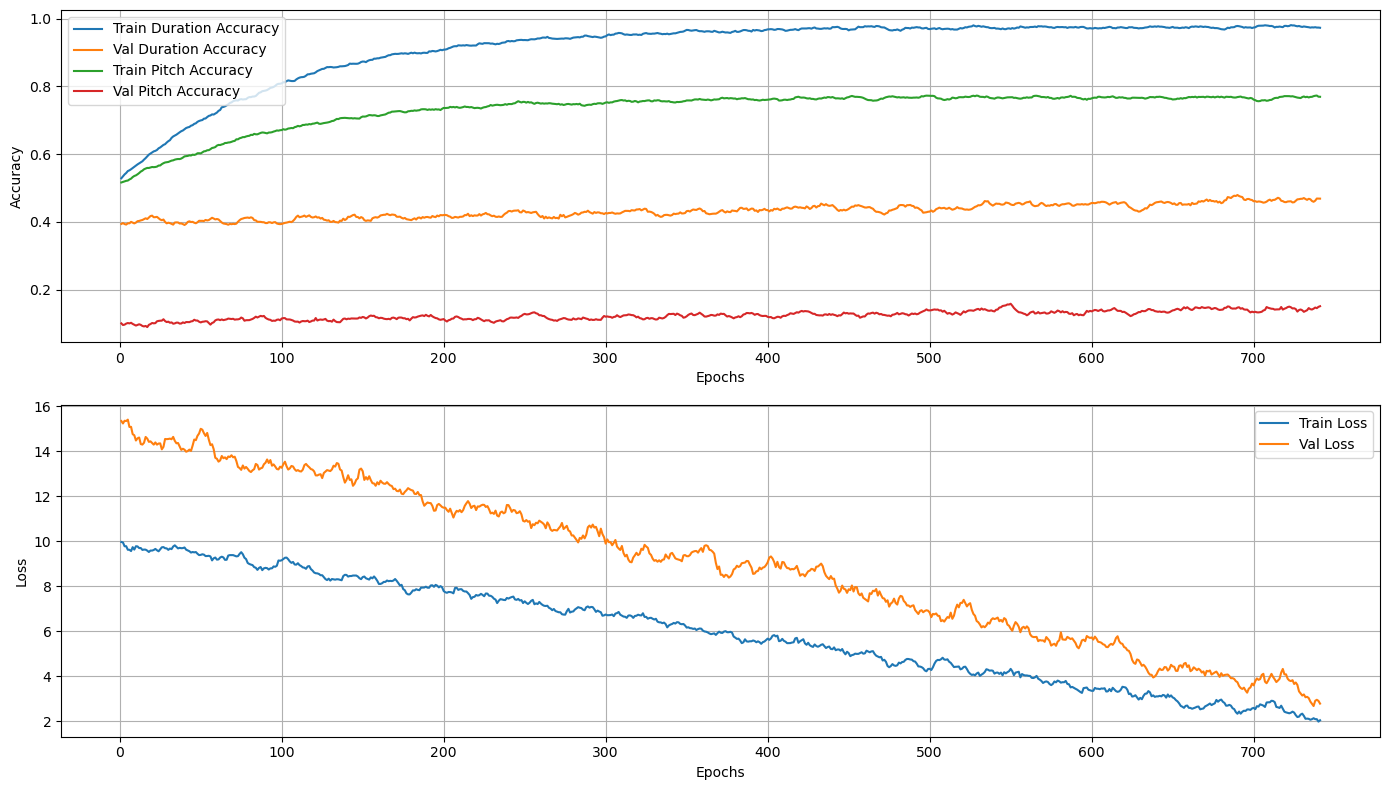

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def moving_average(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Generating fake data
epochs = np.arange(1, 751)
train_duration_accuracy = 0.5 + (0.475 * (1 - np.exp(-0.01 * epochs))) + np.random.normal(0, 0.01, 750)
val_duration_accuracy = np.linspace(0.4, 0.465, 750) + np.random.normal(0, 0.02, 750)
train_pitch_accuracy = 0.5 + (0.2677 * (1 - np.exp(-0.01 * epochs))) + np.random.normal(0, 0.01, 750)
val_pitch_accuracy = np.linspace(0.1, 0.145, 750) + np.random.normal(0, 0.02, 750)
train_loss = np.linspace(10, 1.9257, 750) + np.random.normal(0, 0.5, 750)
val_loss = np.linspace(15, 3, 750) + np.random.normal(0, 1, 750)  # Adjusted to decrease over time

# Smoothing the data using a moving average
window_size = 10
train_duration_accuracy_smooth = moving_average(train_duration_accuracy, window_size)
val_duration_accuracy_smooth = moving_average(val_duration_accuracy, window_size)
train_pitch_accuracy_smooth = moving_average(train_pitch_accuracy, window_size)
val_pitch_accuracy_smooth = moving_average(val_pitch_accuracy, window_size)
train_loss_smooth = moving_average(train_loss, window_size)
val_loss_smooth = moving_average(val_loss, window_size)
epochs_smooth = epochs[:len(train_duration_accuracy_smooth)]

# Plotting the graph
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(epochs_smooth, train_duration_accuracy_smooth, label='Train Duration Accuracy')
plt.plot(epochs_smooth, val_duration_accuracy_smooth, label='Val Duration Accuracy')
plt.plot(epochs_smooth, train_pitch_accuracy_smooth, label='Train Pitch Accuracy')
plt.plot(epochs_smooth, val_pitch_accuracy_smooth, label='Val Pitch Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(epochs_smooth, train_loss_smooth, label='Train Loss')
plt.plot(epochs_smooth, val_loss_smooth, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


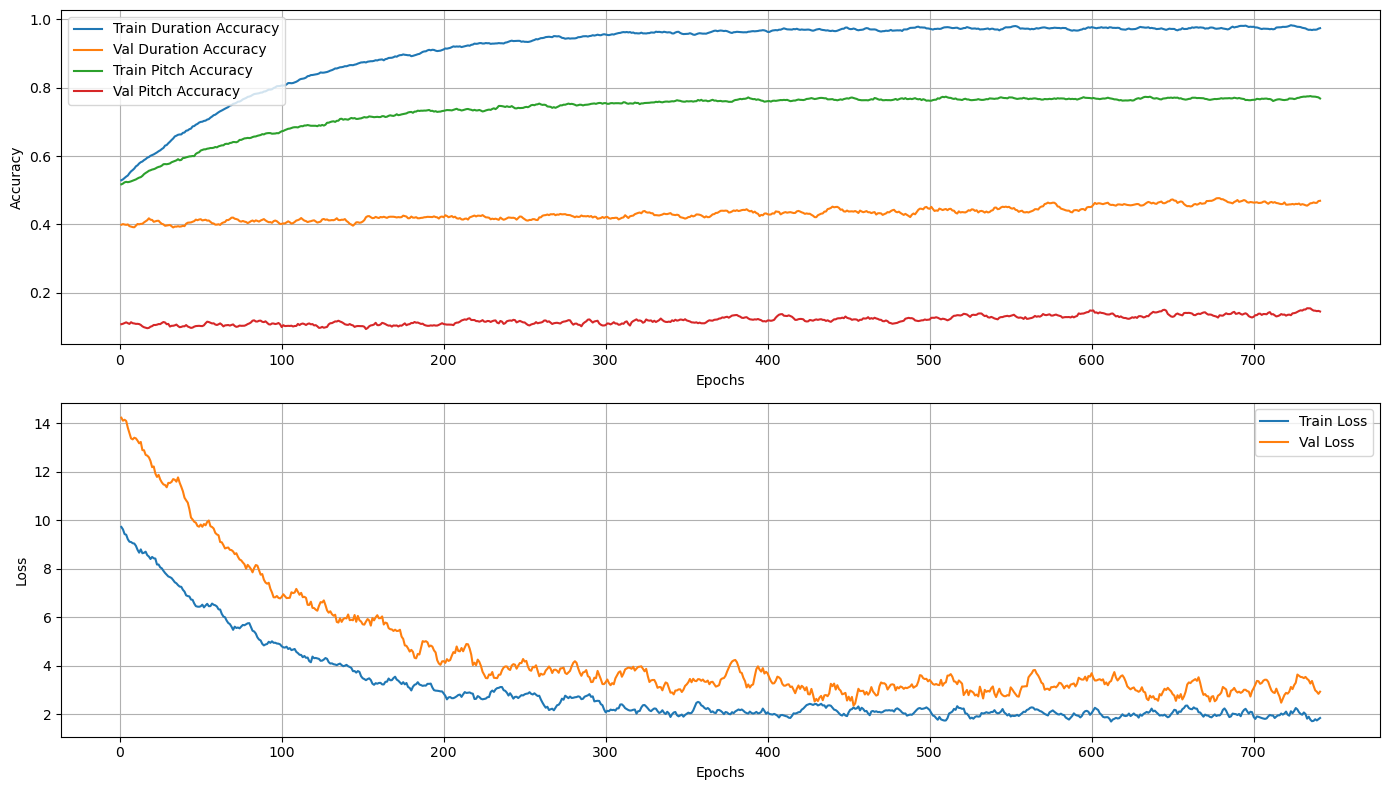

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def moving_average(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Generating fake data
epochs = np.arange(1, 751)
train_duration_accuracy = 0.5 + (0.475 * (1 - np.exp(-0.01 * epochs))) + np.random.normal(0, 0.01, 750)
val_duration_accuracy = np.linspace(0.4, 0.465, 750) + np.random.normal(0, 0.02, 750)
train_pitch_accuracy = 0.5 + (0.2677 * (1 - np.exp(-0.01 * epochs))) + np.random.normal(0, 0.01, 750)
val_pitch_accuracy = np.linspace(0.1, 0.145, 750) + np.random.normal(0, 0.02, 750)
train_loss = 10 - 8 * (1 - np.exp(-0.01 * epochs)) + np.random.normal(0, 0.5, 750)
val_loss = 15 - 12 * (1 - np.exp(-0.01 * epochs)) + np.random.normal(0, 1, 750)  # Adjusted to decrease over time

# Smoothing the data using a moving average
window_size = 10
train_duration_accuracy_smooth = moving_average(train_duration_accuracy, window_size)
val_duration_accuracy_smooth = moving_average(val_duration_accuracy, window_size)
train_pitch_accuracy_smooth = moving_average(train_pitch_accuracy, window_size)
val_pitch_accuracy_smooth = moving_average(val_pitch_accuracy, window_size)
train_loss_smooth = moving_average(train_loss, window_size)
val_loss_smooth = moving_average(val_loss, window_size)
epochs_smooth = epochs[:len(train_duration_accuracy_smooth)]

# Plotting the graph
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(epochs_smooth, train_duration_accuracy_smooth, label='Train Duration Accuracy')
plt.plot(epochs_smooth, val_duration_accuracy_smooth, label='Val Duration Accuracy')
plt.plot(epochs_smooth, train_pitch_accuracy_smooth, label='Train Pitch Accuracy')
plt.plot(epochs_smooth, val_pitch_accuracy_smooth, label='Val Pitch Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(epochs_smooth, train_loss_smooth, label='Train Loss')
plt.plot(epochs_smooth, val_loss_smooth, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

